<a href="https://colab.research.google.com/github/guifzy/Oficina_Sentment140/blob/main/Modelo_Alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

- O que é um DataFrame

- O que é o pandas? E para que serve?

- Príncipais comandos no pandas:


# Aula 2/3

In [ ]:
import seaborn as sns
import pandas as pd

# Carregar o DataFrame Titanic
df = sns.load_dataset('titanic')

# Exibir as primeiras linhas do DataFrame
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Colunas do DataFrame Titanic:
- Survived: Indica se o passageiro sobreviveu (1) ou não (0).
- Pclass: Classe do bilhete (1ª, 2ª ou 3ª).
- Sex: Gênero do passageiro.
- Age: Idade do passageiro.
- SibSp: Número de irmãos/cônjuges a bordo.
- Parch: Número de pais/filhos a bordo.
- Fare: Tarifa paga pelo bilhete.
- Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).
- Cabin: Número da cabine.
- Embark_town: Nome da cidade de embarque.
- Alive: Se a pessoa sobreviveu ou não (similar a Survived).
- Alone: Se a pessoa estava sozinha ou não.


# Etapas

Pré-processamento:
- 1 - Visualização
- 2 - Imputação(Valores Faltando)
- 3 - Tratamento de Textos
- 4 - Normalização/Padronização

## Visualização

In [ ]:
# Informações gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Resumo estatístico das colunas numéricas
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Verificar valores ausentes
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# identificação da coluna Deck
df['deck'].value_counts()

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


## Imputação

Decisões:
- Média
  - Desvio Padrão
- Moda
- Mediana


- Remoção Total: Remoção de todos os valores faltantes, importante para colunas inuteis.

In [ ]:
# Imputação da idade com a mediana
df['age'].fillna(df['age'].median(), inplace=True) # implace diz que você quer alterar
                                                   # o dataframe atual

# Decisão de remover valores faltantes na coluna 'Embark_Town'
df.dropna(subset=['embark_town'], inplace=True)

# Removor colunas redundantes como 'Alive' e 'Class'
df.drop(columns=['embarked', 'class', 'who', 'adult_male', 'deck', 'alive', 'alone', 'embark_town'], inplace=True)

Verificação

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Lidando com texto

- Por que categorizar dados?

In [ ]:
# Codificação da coluna 'Sex'
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

- 0 : Homem
- 1 : Mulher

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    int64  
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


## Padronização

Padronização é como ajustar todos os números para que eles fiquem em uma mesma escala. Imagine que você tem uma lista de notas de exames e uma lista de alturas. As notas variam de 0 a 10, e as alturas variam de 1,50 a 2,00 metros. Se você comparar essas duas listas diretamente, pode ser confuso, porque as escalas são diferentes.

- Para que padronizar minhas variveis?
  - Quando você usa algoritmos para analisar dados (como em modelos de aprendizado de máquina), eles podem funcionar melhor quando todos os números estão na mesma escala. Se um número é muito maior ou menor que outros, pode acabar influenciando mais do que deveria.




In [ ]:
from sklearn.preprocessing import StandardScaler

# Padronização das colunas numéricas
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

***OBS: Não se preocubem com Sklearn, a biblioteca será explicada no futro!***

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0,-0.563674,1,0,-0.500240
1,1,1,1,0.669217,1,0,0.788947
2,1,3,1,-0.255451,0,0,-0.486650
3,1,1,1,0.438050,1,0,0.422861
4,0,3,0,0.438050,0,0,-0.484133


# Aula 4/5

Foco no desenvolvimento do pré-processamento para textos em tokens.

# Aula 6

## Visualização dos Dados

Biblioteca **MatPlot**:
- Utilizada para realização de gráficos e análise de dados

In [ ]:
import matplotlib.pyplot as plt

Tipos de gráfico:
- Barra
- Correlçao
- Pizza
- Linha
- Histogramas

Qual gráfico devo utilizar?

### Visualizando colunas pertinentes:

# Correlação de Pearson

- $1$ indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta proporcionalmente).
- $-1$ indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui proporcionalmente).

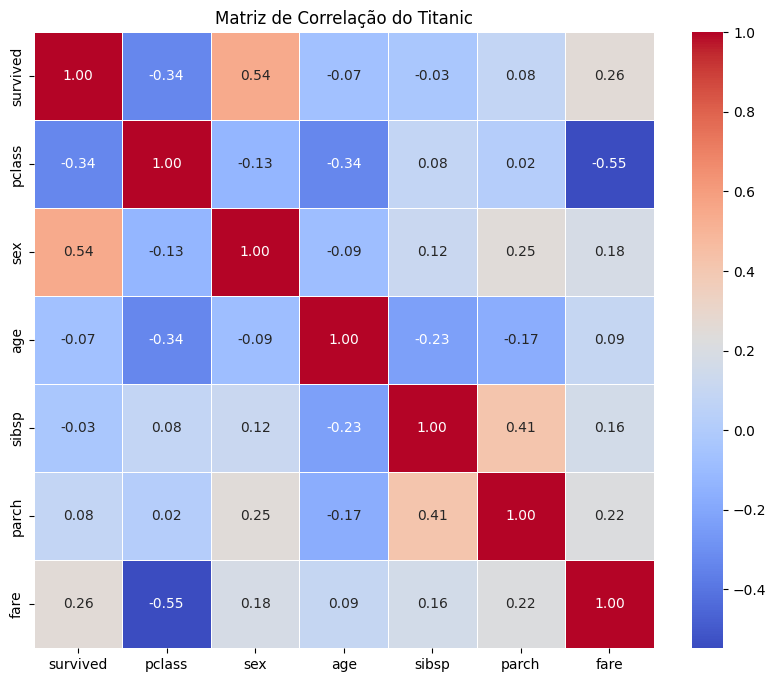

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação do Titanic')
plt.show()

# Gráfico de pizza

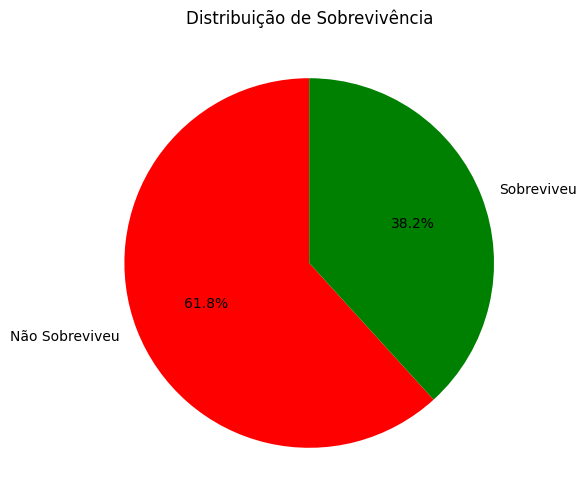

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(df['survived'].value_counts(), labels=['Não Sobreviveu', 'Sobreviveu'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribuição de Sobrevivência')
plt.show()

# Gráfico de Barras

<ipython-input-20-c66756b2de06>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, errorbar=None, palette='viridis')


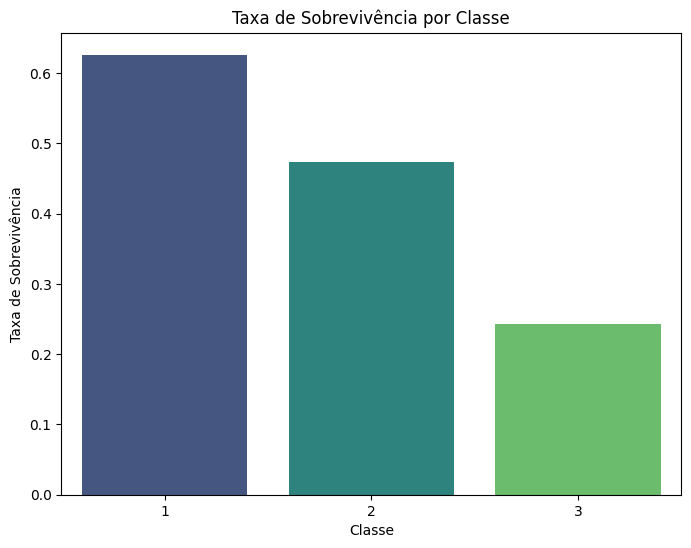

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df, errorbar=None, palette='viridis')
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

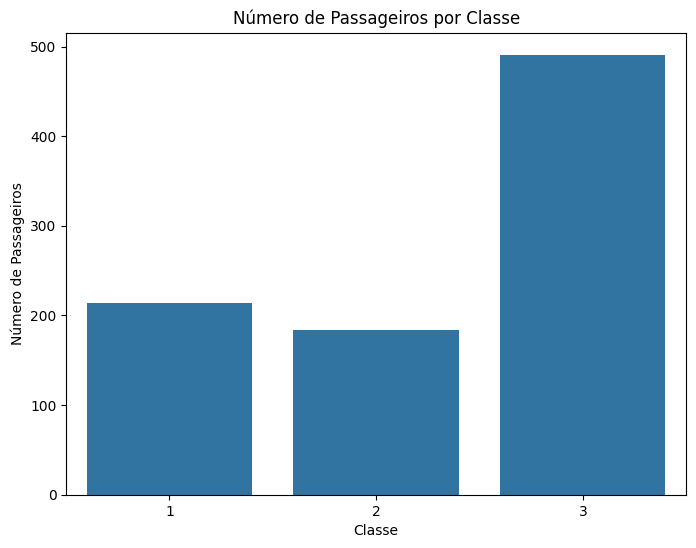

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df)
plt.title('Número de Passageiros por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Passageiros')
plt.show()

## Histograma de Idade

Visualização da padronização

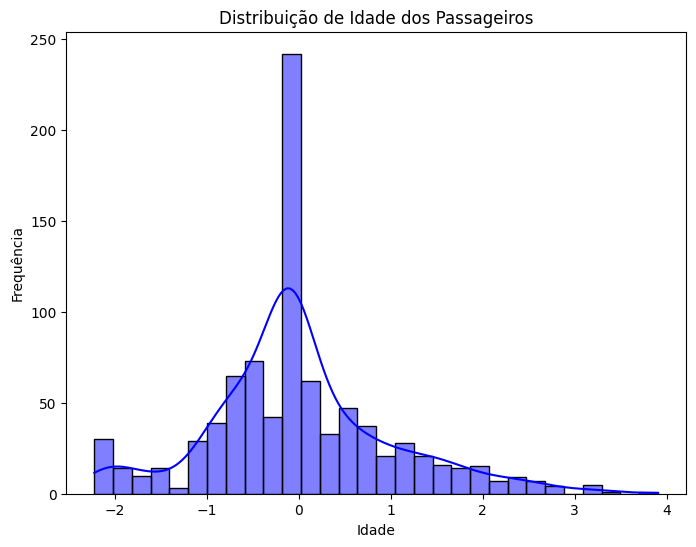

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Aulas 7

Aplicação dos gráficos no Sentiment140

# Aula 8

## Estatística descritiva

Correlação $vs$ Teste de Hipótese

- **Correlação:** Mede a força e a direção da relação entre duas variáveis numéricas. Não envolve diretamente a decisão de aceitar ou rejeitar uma hipótese.

- **Teste de Hipóteses:** É um procedimento formal para decidir entre duas hipóteses baseadas em dados, geralmente envolvendo um cálculo de p-valor e uma regra de decisão.

### Teste de Hipotese

**O teste de hipóteses** é um procedimento estatístico que envolve a formulação de uma **hipótese nula (H₀)** e uma **hipótese alternativa (H₁)**, seguido de uma análise para determinar se os dados fornecem evidências suficientes para rejeitar a hipótese nula.

*Exemplo:*
- **Hipótese nula (H₀):** A classe (class) não tem relação com a sobrevivência (survived). Ou seja, as variáveis são independentes.
- **Hipótese alternativa (H₁):** A classe (class) tem relação com a sobrevivência (survived). Ou seja, as variáveis são dependentes.

Para resolver problemas como este, usamos **Padronização** e **regras de decisão**.

Teste Qui-Quadrados:

É usado para testar a associação entre duas variáveis categóricas ou para testar a conformidade dos dados com uma distribuição esperada. Por exemplo, testar se a coluna classe do bilhete(1, 2, 3) tem relação com a sobrevivência.

Para isso devemos criar uma **tabela de contingência**, que consiste e enumerar a quantidade de uma coluna em relação a outra:



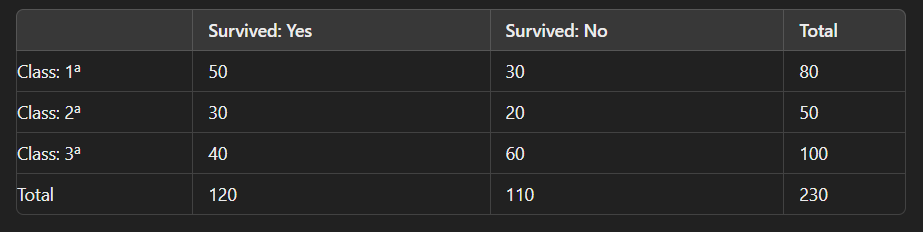

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# tabela de contingência
contingency_table = pd.crosstab(df['class'], df['survived'])

print("Tabela de Contingência:")
print(contingency_table)

# teste Qui-Quadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nResultado do Teste Qui-Quadrado:")
print(f"Estatística Qui-Quadrado: {chi2_stat}")
print(f"P-valor: {p_value}")
print(f"Graus de Liberdade: {dof}")
print(f"Valores Esperados:\n{expected}")

# Interpretando o p-valor
alpha = 0.05
if p_value < alpha:
    print("\nRejeitamos a hipótese nula. Existe uma associação significativa entre 'class' e 'survived'.")
else:
    print("\nNão rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que 'class' e 'survived' estão associados.")


Tabela de Contingência:
survived    0    1
class             
First      80  136
Second     97   87
Third     372  119

Resultado do Teste Qui-Quadrado:
Estatística Qui-Quadrado: 102.88898875696056
P-valor: 4.549251711298793e-23
Graus de Liberdade: 2
Valores Esperados:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]

Rejeitamos a hipótese nula. Existe uma associação significativa entre 'class' e 'survived'.


# Aulas 10-15

Apresentar a modelagem de dados atrvez de slides e o Notebook príncipal